# Logistische Regression mit Python und exploratorische Datenanalyse

Ein ähnliches Konzept wurde im 2. Blogbeitrag als "lineares Modell für Klassifikation" vorgestellt und wird in diesem Blogbeitrag erweitert.

Es handelt sich um die logistische Regression. Das ist ein Modell für Regressionsanalyse, wobei die abhängige Variable kategorisch ist. Das heißt, wir können dieses Modell für Klassifikation verwenden. Ein weiterer Vorteil der logistischen Regression ist, dass sie auch die Wahrscheinlichkeit liefert, dass eine Stichprobe zur ausgewählten Klasse gehört.

## Praktische Beispiele
Typische Anwendung der logistischen Regression wäre beim Banking, wo man auf Basis von Alter, Gehalt, Beruf und vielen anderen Parametern, die Wahrscheinlichkeit berechnet, dass ein Kunde den gewünschten Kredit zurückzahlt. Abhängig vom Ergebnis, entscheidet man, ob der Kunde kreditwürdig ist oder nicht.

## Formale Definition

Wie bei der linearen Regression sucht man geeignete Koeffiziente (*w*), sodass man das Modell mit der folgenden Formel beschreiben kann:

`y = w0 + w1*x1 + w2*x2 + ... + wn*xn`

Dies liefert eine Zahl, die beliebig groß oder klein sein kann und gar nichts mit Wahrscheinlichkeiten zu tun hat. Um eine Wahrscheinlichkeit zu erhalten benötigen wir eine Zahl zwischen 0 und 1, die wir mit der logistischen Funktion errechnen.

### Logistische Funktion

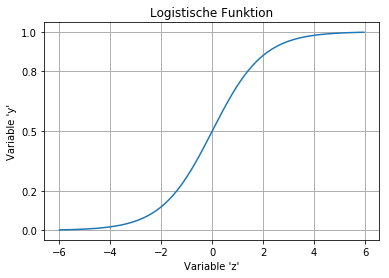

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def logistic(x):
    return 1 / (1 + np.exp(-x))

# logistische Funktion plotten
t = np.arange(-6,6,0.05)
plt.plot(t, logistic(t))
plt.yticks([0, 0.2, 0.5, 0.8, 1])
plt.grid(linewidth=1)
plt.title("Logistische Funktion")
plt.xlabel("Variable 'z'")
plt.ylabel("Variable 'y'")
plt.show()

Die logistische Funktion ist als `1 / 1 + e^-z` definiert, wobei *e* die Eulersche Zahl ist (~2,71828...). Diese Zahl ist die Basis des natürlichen Logarithmus.

Es ist zu sehen, dass die Ausgabe der logistischen Funktion zwischen 0 und 1 beschränkt ist. Interessant ist auch, dass bei `z=0`, der Ausgabewert genau `0.5` ist.

Jetzt kann man *z* in der Formell durch `w0 + w1*x1 + w2*x2 + ... + wn*xn` ersetzen, und so bekommt man das Modell der logistischen Regression. 

Die Anpassung der Gewichtungen *w* ist mathematisch aufwänding und nicht Umfang dieses Blogbeitrags. Stattdessen, wird hier die Implementierung und Anwendung von logistischen Regression gezeigt. 

## Datensatz

Wir werden den [Irisdatensatz](https://en.wikipedia.org/wiki/Iris_flower_data_set) hier verwenden, den man mit *scikit-learn* bekommen kann. Danach werden wir ihn in Trainings- und Testdaten aufteilen.

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()

# Trainings- und Testdaten erzeugen
train_x, test_x, train_y, test_y = train_test_split(data.data, data.target)

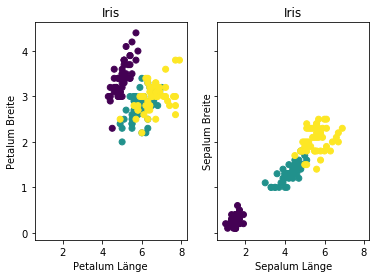

In [25]:
import matplotlib.pyplot as plt

# Datensatz plotten
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax1.scatter(data.data[:, 0], data.data[:, 1], c=data.target)
ax1.set(title="Iris", ylabel='Petalum Breite', xlabel='Petalum Länge')
 
ax2.scatter(data.data[:, 2], data.data[:, 3], c=data.target)
ax2.set(title="Iris", ylabel='Sepalum Breite', xlabel='Sepalum Länge')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.show()

## Implementierung

Man kann ein ganz einfaches Modell mit `sklearn.linear_model.LogisticRegression` erstellen. Nachdem es angepasst wird, kann man die Testdaten klassifizieren und die Genauigkeit bestimmen.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_x, train_y)

# Klassifikationsgüte berechnen
print("Genauigkeit: %f" % accuracy_score(test_y, clf.predict(test_x)))

Genauigkeit: 0.947368


Diese Methode liefert uns aber wenige Erkenntnisse über die Funktionsweise und Anwendung der logistischen Regression. 

Die einfachste Form dieses Modells ist die binäre logistische Regression. Das heißt man kann nur zwischen zwei Klassen unterscheiden. Falls mehrere Klassen vorhanden sind, dann muss für jede Klasse ein Klassifikator erstellt werden, der nur überprüft, ob eine Stichprobe zu dieser Klasse gehört oder nicht. Dies wird auch *one-vs.-all* Klassifikation genannt. `sklearn` macht das implizit, falls `multiclass='ovr'` als Konstruktorparameter eingegeben wird.

*Scikit-learn* enthält viele Optimierungen, die in bestimmten Fällen bessere Genauigkeit und Leistung liefern können. Sie sind aber im Allgemeinen für Fortgeschrittene besser geeignet. Man sollte sich die [Dokumentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) anschauen um mehr darüber zu erfahren. 

## Logistische Regression für Datenanalyse

Eine der Anwendungen des Regressionmodells ist es Daten zu Analysieren und die Beziehungen zwischen den unabhängigen und abhängigen Variablen zu untersuchen. Für das hier gezeigte Beispiel wird die `pandas` Bibliothek benötigt. Diese erleichtert sowohl die Tabellenmanipulation als auch deren Tabellen Darstelltung.

Der Datensatz kommt aus dem [General Assembly Datascience Kurs in San Franzisko](https://generalassemb.ly/education/data-science/san-francisco). Die unabhängige Variablen sind Studentenleistungen aus den USA.

[*Link zum Datensatz*](https://github.com/ga-students/sf-dat-21/blob/master/unit-projects/dataset/admissions.csv)


In [27]:
import pandas as pd

df = pd.read_csv("https://github.com/ga-students/sf-dat-21/raw/master/unit-projects/dataset/admissions.csv")
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### Beschreibung des Datensatzes
- `gre` - *numerisch* - zw. 220 und 800 - Ergebnis auf das standartisierte Test *Graduate Record Examinations* (GRE). 800 ist das Höchste
- `gpa` - *numerisch* - zw. 0.0 und 4.0 - Entspricht etwa einem Notendurchschnitt. 4.0 ist das Höchste
- `prestige` - *ordinal-kategorisch* - 1,2,3 oder 4 - Die Prestige der Schule des Bewerbers. 1 ist das Höchste
- `admit` - **die abhängige Variable** - 0 bedeutet der Student wurde nicht zugelassen, 1 - der Student wurde zugelassen

Eine andere nützliche Funktion ist `DataFrame.describe()` die Informationen über jede Spalte in der Tabelle liefert.

In [28]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


### Reihennamen
- `count` - Die Anzahl der Stichproben mit diesem Merkmal.
- `mean` - Der Mittelwert der Elemente jedes Merkmals.
- `std` - Stadardabweichung - Mit ihr kann man ermitteln, wie stark die Streuung der Werte um einen Mittelwert ist
- `min` - Die niedrigsten Werte jedes Merkmals.
- `25%` und `75%` - Der Mittelwert der niedrigsten 25% bzw. die höchsten 75% der Daten.
- `50%` - Dasselbe wie den Mittelwert.
- `max` - Die höchsten Werte jedes Merkmals.

Eine andere interessante Funktion aus `pandas` ist `pd.crosstab`. Sie bietet die Möglichkeit eine multidimensionale Frequenzanalyse zu machen. Der folgende Code zeigt die Anzahl von zugelassenen und nicht zugelassenen Studenten für jede Prestigeklasse.

In [29]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,97,93,55
1,33,53,28,12


Eine ähnliche Funktion hat das Histogramm. Jeder Balken im Diagramm zeigt die Anzahl von Stichproben, die eine bestimmte Wert haben (z.B. wie viele Studenten einen `gpa` von 3,5 haben).

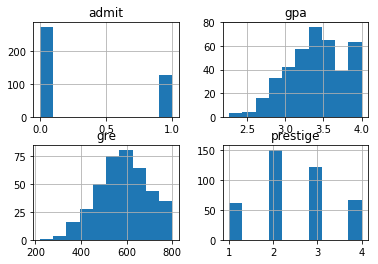

In [30]:
df.hist()
plt.show()

Das Merkmal *prestige* ist ordinal-kategorisch. Das bedeutet, dass man die Werte vergleichen kann. 1 ist besser als 2, und 2 ist besser als 3, und so weiter. Trotzdem kann man den Unterschied zwischen den Werten nicht quantifizieren. Um besser die Beziehungen zum abhängigen Variable bestimmen zu können, wäre es sinnvoller das Merkmal als mehrere Dummy-Variablen zu kodieren. Die Funktion `pd.get_dummies` erleichtert diesen Prozess. 

In [31]:
dummies = pd.get_dummies(df['prestige'], prefix='prestige')
dummies.head()

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [47]:
# saubere Tabelle erstellen nur mit den benötigten Merkmalen
data = df[['admit', 'gpa', 'gre']].join(dummies.loc[:, 'prestige_2.0':])

# Zeilen mit fehlneden Daten anzeigen
data[data.isnull().any(axis=1)]

,admit,gpa,gre,prestige_2.0,prestige_3.0,prestige_4.0
187,0,NaN,NaN,1,0,0
212,0,2.87,NaN,1,0,0
236,1,NaN,660.0,0,0,0


Fehlende Daten sind ein häufiges Problem in Data Science und es gibt verschiedene Möglichkeiten damit umzugehen. Der einfachste Weg ist, die Zeilen mit fehlenden Merkmalen einfach zu löschen. Und genau das machen wir, weil es nur 3 problematische Zeilen gibt, also weniger als 2% des gesamten Datensatzes.

Andere Möglichkeiten, mit fehlenden Daten umzugehen, hängen von der Typ der Daten ab. Fehlende numerische Merkmale können durch den Mittelwert der anderen Stichproben ersetzt werden, und fehlende kategorische Daten können durch die am häufigsten vorliegende Klasse im Datensatz ersetzt werden.

Eventuell kann man auch ein kNN- oder Regressionsmodell anpassen, um die fehlenden Werte vorherzusagen.

In [32]:
# alle Zeilen, wo eine NaN vorliegt entfernen
data = data.dropna(axis=0, how='any')
data.head()

,admit,gpa,gre,prestige_2.0,prestige_3.0,prestige_4.0
0,0,3.61,380.0,0,1,0
1,1,3.67,660.0,0,1,0
2,1,4.00,800.0,0,0,0
3,1,3.19,640.0,0,0,1
4,0,2.93,520.0,0,0,1


Es ist zu bemerken, dass *prestige_1* nicht in der Tabelle liegt. Wir wollen es als Grundlinie für die Analyse benutzen und berücksichtigen es nicht bei der Anpassung des Modells. Der Grund dafür ist die [Multikollinearität](https://de.wikipedia.org/wiki/Multikollinearit%C3%A4t), die bei Verwendung mehrerer Variablen enstehen kann, die in starker Korrelation zueinander stehen. Die Konsequenz davon ist, dass die Analyse der Regressionskoeffiziente dann ungenau ist.

In [33]:
clf = LogisticRegression()

# Trainings- und Testdaten erzeugen
train_x, test_x, train_y, test_y = train_test_split(
                                        data.loc[:,'gpa':], 
                                        np.ravel(data[['admit']]))

# Tabelle zu numpy Array konvertieren und dann vom Spaltenvektor
# ins 1d-Array umwandeln
clf.fit(train_x, train_y)

# Analyse von Koeffizienten und Chancen
coef = pd.DataFrame({'features': train_x.columns, 
                     'coef': clf.coef_[0], 
                     'odds_ratio': np.exp(clf.coef_[0])})

coef[['features', 'coef', 'odds_ratio']]

,features,coef,odds_ratio
0,gpa,-0.050584,0.950674
1,gre,0.001942,1.001944
2,prestige_2.0,-0.482162,0.617447
3,prestige_3.0,-1.084279,0.338145
4,prestige_4.0,-1.463294,0.231472


Wir haben das Modell angepasst und analysieren die Koeffizienten. In der Spalte *coef* befinden sich die Gewichtungen des Modells. Es ist zu sehen, dass es eine Starke negative Abhängigkeit gibt, falls sich der Stundent in Prestigegruppe 4 befindet. 

In der Spalte *odds_ratio* sieht man wie sich die Zulassungschancen verändern, für die Veränderung des Merkmals um eine Einheit. Falls die Schule des Bewerbers prestige 2 hat, sind die Zulassungschancen um 50% niedriger.

Schließlich berechnen wir die Klassifikationsgüte

In [39]:
# Klassifikationsgüte anhand der Testdaten berechnen 
from sklearn.metrics import accuracy_score

accuracy_score(clf.predict(test_x), test_y)

0.75

### Schlussfolgerung
Die logistische Regression ist ein ausgezeichneter Klassifikationsalgorithmus, den man auch für detaillierte Analyse verwenden kann. Der Algorithmus ist nicht so leistungsfähig wie z.B *Support Vector Machines*, aber dafür liefert er wichtige Einsichten über Zusammenhänge im Datensatz.

## Resourssen

- Git Repository mit dem kompletten Code - [Link](https://github.com/emomicrowave/machine-learning-tutorials/blob/master/04-logistic_regression/tutorial.ipynb)
- detaillierteres Tutorial über Regressionsanalye - [Link](http://blog.yhat.com/posts/logistic-regression-python-rodeo.html) 